In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#importação e visualização

url = 'https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv'

tabela = np.loadtxt(url,delimiter=',',usecols=np.arange(1,6,1),skiprows=1)
print(tabela)

[[  2.96  86.76 172.    85.     2.  ]
 [  3.91  88.05 166.    78.     3.  ]
 [  4.42  95.17 156.    81.     2.  ]
 ...
 [ 15.59 256.5  168.    82.    20.  ]
 [ 15.92 260.14 142.    72.    11.  ]
 [ 16.45 261.51 152.    74.     2.  ]]


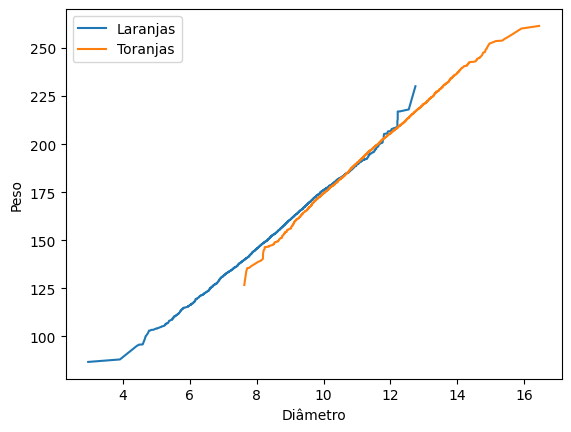

In [4]:
#seleção

laranjas = tabela[:4999,:2]
toranjas = tabela[5000:,:2]


plt.plot(laranjas[:,0],laranjas[:,1],label='Laranjas')
plt.plot(toranjas[:,0],toranjas[:,1],label='Toranjas')
plt.xlabel('Diâmetro')   #unidades desconhecidas, mas parece ser grama e centimetro
plt.ylabel('Peso')
plt.legend()
plt.show()

Resultado dos mínimos quadrados para as laranjas: 2.9990047506196524


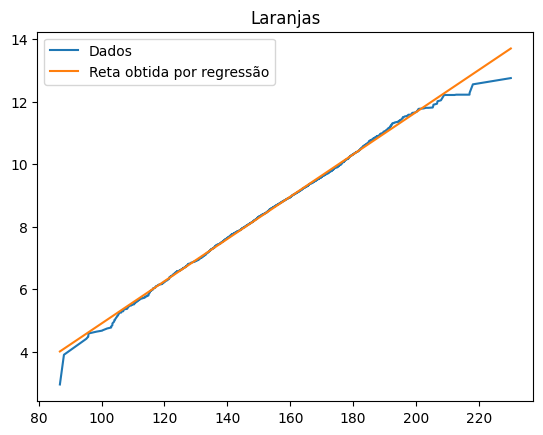

Resultado dos mínimos quadrados para as toranjas: 2.8379699629531925


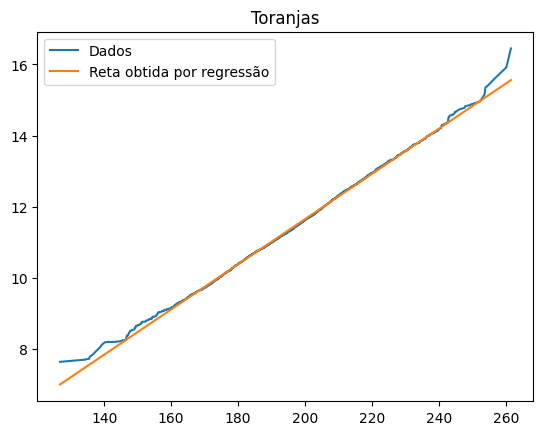

In [5]:
#regressão

laranjas_peso = laranjas[:,0]
laranjas_diam = laranjas[:,1]
toranjas_peso = toranjas[:,0]
toranjas_diam = toranjas[:,1]

Xl = laranjas_diam
Yl = laranjas_peso
nl = np.size(laranjas_diam)

Xt = toranjas_diam
Yt = toranjas_peso
nt = np.size(toranjas_diam)

#laranjas

coan_laranja = (nl*np.sum(Xl*Yl) - np.sum(Xl)*np.sum(Yl))/(nl*np.sum(Xl**2)-np.sum(Xl)**2)
coli_laranja = np.mean(Yl) - coan_laranja*np.mean(Xl)
yl = coan_laranja*Xl + coli_laranja
print(f"Resultado dos mínimos quadrados para as laranjas: {np.linalg.norm(Yl-yl)}")

plt.plot(Xl,Yl,label='Dados')
plt.plot(Xl,yl,label='Reta obtida por regressão')
plt.legend()
plt.title('Laranjas')
plt.show()

#toranjas

coan_toranja = (nt*np.sum(Xt*Yt) - np.sum(Xt)*np.sum(Yt))/(nt*np.sum(Xt**2)-np.sum(Xt)**2)
coli_toranja = np.mean(Yt) - coan_toranja*np.mean(Xt)
yt = coan_toranja*Xt + coli_toranja
print(f"Resultado dos mínimos quadrados para as toranjas: {np.linalg.norm(Yt-yt)}")

plt.plot(Xt,Yt,label='Dados')
plt.plot(Xt,yt,label='Reta obtida por regressão')
plt.legend()
plt.title('Toranjas')
plt.show()

In [37]:
#calculando por numeros aleatórios
b = 17 #dado
np.random.seed(64)
aleat = np.random.uniform(low=0.0,high=30.0,size=4999)

normas = np.array([])
for i in range(4999):
  normas = np.append(normas,np.linalg.norm(Yl-(aleat[i]*Xl+b)))

print(f'A menor norma é: {normas.min()}')
print(f'Na posição {normas.argmin()} da array normas')


A menor norma é: 613.0480087342848
Na posição 1856 da array normas
